**CNN for Cambara App**

Library yang dibutuhkan

In [1]:
import io
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.preprocessing import image
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Path Dir untuk Datasetnya

In [2]:
base_dir = '/content/drive/MyDrive/Aksara'
!ls '/content/drive/MyDrive/Aksara'

train_dir = os.path.join(base_dir, 'Data_Train_Aksara')
val_dir = os.path.join(base_dir, 'Data_Test_Aksara')

train_data_dir = '/content/drive/MyDrive/Aksara/Data_Train_Aksara'
validation_data_dir = '/content/drive/MyDrive/Aksara/Data_Test_Aksara'

Dara_Test_Aksara2  DatasetAksaraWianjana2  Data_Test_Aksara  Data_Train_Aksara


CNN Model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(18, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

#Syntax untuk train modelnya
history = model.fit(train_generator, steps_per_epoch=118,validation_data=validation_generator, validation_steps=50, epochs=10)

model.save('aksara_bali_model.h5')

Found 3787 images belonging to 18 classes.
Found 1615 images belonging to 18 classes.
Epoch 1/10
118/118 [==============================] - 262s 2s/step - loss: 1.9698 - accuracy: 0.3846 - val_loss: 1.2314 - val_accuracy: 0.6219
Epoch 2/10
118/118 [==============================] - 245s 2s/step - loss: 0.7057 - accuracy: 0.7694 - val_loss: 1.1544 - val_accuracy: 0.6825
Epoch 3/10
118/118 [==============================] - 245s 2s/step - loss: 0.4361 - accuracy: 0.8522 - val_loss: 1.0184 - val_accuracy: 0.7625
Epoch 4/10
118/118 [==============================] - 245s 2s/step - loss: 0.3063 - accuracy: 0.9015 - val_loss: 1.1026 - val_accuracy: 0.7844
Epoch 5/10
118/118 [==============================] - 226s 2s/step - loss: 0.2378 - accuracy: 0.9201 - val_loss: 0.9740 - val_accuracy: 0.7931
Epoch 6/10
118/118 [==============================] - 244s 2s/step - loss: 0.2235 - accuracy: 0.9260 - val_loss: 0.9977 - val_accuracy: 0.8125
Epoch 7/10
118/118 [==============================] - 24

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualisasi akurasi terhadap training dan validasi data

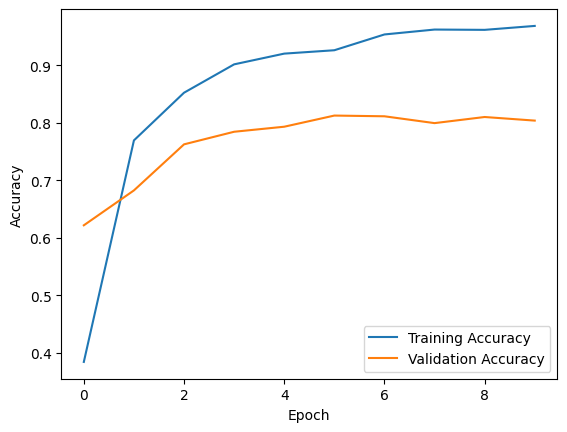

In [4]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Ujicoba

Saving 1coba.png to 1coba.png


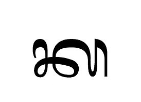

1/1 [==============================] - 0s 143ms/step
Gambar tersebut merupakan huruf Ka


In [16]:
loaded_model = tf.keras.models.load_model('aksara_bali_model.h5') #manggil model h5

def preprocess_image(img):
    img = image.load_img(img, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array #preprocessing terhadap image yang dimasukkan

uploaded = files.upload()

img_path = list(uploaded.keys())[0]
img = preprocess_image(io.BytesIO(uploaded[img_path]))
display.display(display.Image(data=uploaded[img_path], width=150, height=150))

prediksi = loaded_model.predict(img)
index_kelas_prediksi = np.argmax(prediksi)
hasil_prediksi = list(train_generator.class_indices.keys())[index_kelas_prediksi]

print("Gambar tersebut merupakan huruf", hasil_prediksi)